# Reinforcement learning (RL)

A computational approach to learning from interaction with the environment [1]. 

![Robot learns to walk](https://blogs.nvidia.com/wp-content/uploads/2016/01/robot_walk700px1.png)

Image from https://blogs.nvidia.com/blog/2016/01/15/deep-learning-robot-walk/

## What is it used for?

![RL use](rluse.png)

Image from https://www.davidsilver.uk/wp-content/uploads/2020/03/intro_RL.pdf

Everywhere where autonomous decision making is required. For example:

* Teach robot to walk 
* Play board games (chess, go), play computer games
* For [Autonomous Control of a Particle Accelerator](https://arxiv.org/abs/2010.08141)
* Teach helicopter to fly autonomously and make maneuvers
* ...

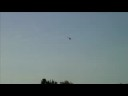

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('0JL04JJjocc', width=400, height=300)

See [the paper of Andrew Ng et al](https://people.eecs.berkeley.edu/~jordan/papers/ng-etal03.pdf) for more information on autonomous helicopter.

## Reinforcement learning vs. unsupervised learning

Both do not have a labeled dataset. However, while unsupervised learning tends to find underlying data structure, the goal of reinforcement learning is to find an optimal strategy to maximize the reward. More differences is in the table below.

|Unsupervised learning | Reinforcement learning|
|:-|:-|
|Learning underlying data structure| Learning optimal strategy by trial and error|
|No feedback required| Needs feedback on agent's own actions|
|Model does not affect the input data| Agent can affect it's own observations|
|Time does not play a role| Time is important|

## Elements of reinforcement learning

* An **agent** is a learner and decision maker. It seeks to archieve a goal, performs **actions** $a$ to change its **state** $s$ and may influence the **environment**.

* An **environment** is the thing agent interacts with, comprising everything outside the agent. It may be uncertain.

* A **policy** $\pi(a, s)$ defines the learning agent's way  of behaving at a given time.

* A **reward** signal $r$ defines the goal of a RL problem. In general, reward signals may be stochastic functions of the state of the environment and the actions taken. Indicates what is good in immediate case. Rewards a given directly by the enwironment.

* A **value function** $v$ in contrast specifies what is good in the long run. Roughly speaking, a **value** of the state  is the total amount of reward an agent can expect to accumulate  over the future, starting from that state. Values must be estimated and re-estimated from the sequence of observations an agent makes over its entire lifetime. A value function of a state $s$ under a policy $\pi$ is usually denoted $v_{\pi}(s)$.

* A **model** of the environment mimics the behavior of the environment and allows inferences to be made about how the environment will behave. For example, given a state and an action, the model might predict the resultant next state and the next reward. [1]

![cat](https://www.guru99.com/images/1/082319_0514_Reinforceme2.png)
Image from https://www.guru99.com/reinforcement-learning-tutorial.html

Consider the scenario of teaching new tricks to your cat. In this case,
 * Your cat is an **agent** that is exposed to the **environment**. In this case, it is your house. An example of a **state** could be your cat sitting, and you use a specific word in for cat to walk.
 
 * Our agent reacts by performing an **action** - transition from one "state" to another "state." For example, your cat goes from sitting to walking.
 
 * The reaction of an agent is an action, and the **policy** is a method of selecting an action given a state in expectation of better outcomes.
 
 * After the transition, they may get a **reward** or penalty in return [2]. 

## Introduction to Openai gym

Gym [3] is a toolkit for developing and comparing reinforcement learning algorithms. 

![gym](https://gym.openai.com/assets/docs/aeloop-138c89d44114492fd02822303e6b4b07213010bb14ca5856d2d49d6b62d88e53.svg)

Gym has collection of environments.

The three main methods of an environment are
* **reset()** - reset environment to initial state, _return first observation_
* **render()** - display current environment state 
* **step(a)** - commit action $a$ and return a tuple (new observation, reward, is done, info)
 * *new observation* - an observation right after commiting the action $a$
 * *reward* - a real number representing your reward for commiting action $a$
 * *is done* - True if the goal is reached, False if game is still in progress
 * *info* - some auxilary stuff about what just happened.

In [2]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import gym
from rendermcar import render_mcar

%matplotlib inline

In [3]:
import os
# This code creates a virtual display to draw game images on.
# This works for google colab, but not for the cluster
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

### Openai gym Mountain Car environment

The function `env.render()` may not work on cluster. You may use my visualization function instead. It is not that fancy, but works. in this case you should replace everywhere `env.render(mode='rgb_array')` with `render_mcar(env)`

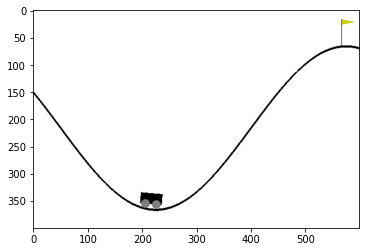

In [4]:
# example with standard rendering function (may not work on cluster)
env = gym.make("MountainCar-v0").env
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once

for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample() # take a random action
    env.step(action)
env.close()

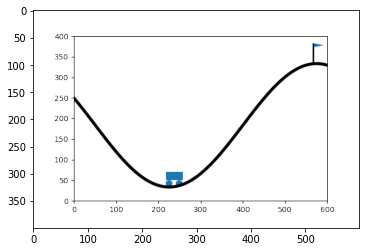

In [5]:
# example with my rendering function (should work everywhere)
env = gym.make("MountainCar-v0").env
env.reset()
img = plt.imshow(render_mcar(env)) # only call this once

for _ in range(100):
    img.set_data(render_mcar(env)) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample() # take a random action
    env.step(action)
env.close()

**Observation space**

| index | description |
| :- | :- |
| 0 | car position |
| 1 | car velocity |

**Action space**

| action | description |
| :- | :- |
| 0 | go left |
| 1 | stop |
| 2 | go right |

Observation space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space: Discrete(3)


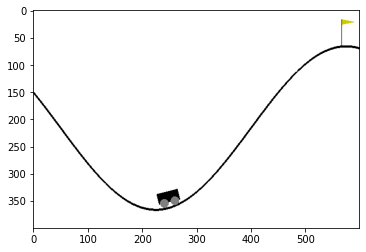

In [6]:
env = gym.make("MountainCar-v0").env
env.reset()

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [7]:
obs0 = env.reset()
print("Initial observation:", obs0)
print("Car position: {a}, car velocity: {b}".format(a=obs0[0], b=obs0[1]))

Initial observation: [-0.46069042  0.        ]
Car position: -0.46069041610297756, car velocity: 0.0


In [8]:
print("Taking action 2 (go right)")
new_obs, reward, is_done, _ = env.step(2)

print("New observation:", new_obs)
print("Reward:", reward)
print("Is game over?:", is_done)

env.close()

Taking action 2 (go right)
New observation: [-0.46015943  0.00053098]
Reward: -1.0
Is game over?: False


Let's play a little.

### Exercise 1: 

bring the car to the top of the moutain. The motor of the car is weak and always "go right" will not work. Your task is to define a **policy** --- a way how the next action is taken --- to finish the game as soon as possible.

Exercise is taken from [4].

In [9]:
from IPython import display

# Create env manually to set time limit. You don't need to change this
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {'left': 0, 'stop': 1, 'right': 2}

In [10]:
def policy(obs, t):
    # Write the code for your policy here. You can use the observation
    # (a tuple of position and velocity), the current time step, or both,
    # if you want.
    position, velocity = obs
    
    if velocity == 0:
        return actions['right']
    
    current_action = 0 if velocity < 0 else 2
    epsilon = 1e-03
    action = (current_action + 2)%4 if abs(velocity) < epsilon else current_action

    #return actions['right']
    return action

In [11]:
(2+2)%4

0

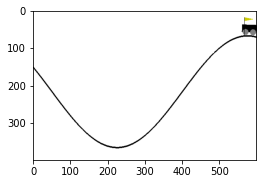

In [12]:
# your goal is to end the episode as quickly as possible.

plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()
    
    action = policy(obs, t)  # Call your policy
    obs, reward, done, _ = env.step(action)  # Pass the action chosen by the policy to the environment
    
    # Draw game image on display.
    plt.imshow(env.render('rgb_array'))
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)
env.close()

## Tabular solution methods

Such methods are usually used if the state and the action spaces are small enough for the approximate value functions to be represented as arrays, or tables [1].

###  Multi-armed Bandits 

This is a special case of RL problem in which there is only a single state. It uses the training information that *evaluates* the actions taken rather than *instructs* by giving correct actions [1].

### Markov decision processes (MDP)

**Main MDP elements:**

* Environment states $s\in S$, where $S$ is the states space.

* Agent actions $a\in A$, where $A$ is the actions space.

* Rewards $r\in \mathbb{R}$

* Dynamics $P(s_{t+1}|s_t, a_t)$

Markov assumption:

$$P(s_{t+1}|s_t, a_t, s_{t-1}, a_{t-1}) = P(s_{t+1}|s_t, a_t)$$

Total reward for session: $R = \sum\limits_t r_t$

Agent's policy $\pi(a|s) = P(\text{take action } a|\text{in state } s)$

**Problem:** find policy with highest reward [5]:

$$\pi(a|s): \mathbb{E}_{\pi}(R)\to\max$$

### Cross-entropy method (tabular)

1. Intialize policy. Policy is a matrix $\pi(a|s) = A_{s,a}$
2. Repeat:
    * Sample $N$ sessions
    * Pick $M$ best sessions, called *elite sessions*. Elite$ = [(s_0, a_0), \dots(s_M, a_M)]$
    * Change policy so that it prioritizes actions from elite sessions [5].
    
Let's see how it works in praxis. The code is pre-implemented. You will need just to run in. The demo below is based on https://github.com/yandexdataschool/Practical_RL/blob/coursera/week1_intro/crossentropy_method.ipynb

| Image from http://ai.berkeley.edu/lecture_slides.html | Image from [5] |
|:-|:-|
|![cliff](cliff2.png)| ![field](cliff3.png)|

We will consider `Cliff walking` environment. Agent needs to find his way to the gem and should not fall into the cliff. He can perform actions causing movement up, down, right, and left. Reward is $-1$ on all transitions except those into the the region marked “The Cliff.” Stepping into this region incurs a reward of $-100$ and sends the agent instantly back to the start.  

In [13]:
env = gym.make("CliffWalking-v0")
env.reset()
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [14]:
n_states = env.observation_space.n
n_actions = env.action_space.n

print("n_states=%i, n_actions=%i" % (n_states, n_actions))

n_states=48, n_actions=4


**Create stochastic policy**

This time our policy should be a probability distribution.

```policy[s,a] = P(take action a | in state s)```

We will initialize policy __uniformly__, that is, probabililities of all actions should be equal.


In [15]:
policy = np.full(shape=(n_states, n_actions), fill_value=1/n_actions)

**Play the game**

In [16]:
def generate_session(env, policy, t_max=10**4):
    """
    Play game until end or for t_max ticks.
    :param policy: an array of shape [n_states,n_actions] with action probabilities
    :returns: list of states, list of actions and sum of rewards
    """
    states, actions = [], []
    total_reward = 0.

    s = env.reset()

    for t in range(t_max):

        a = np.random.choice(np.arange(n_actions), p=policy[s])

        new_s, r, done, info = env.step(a)

        # Record state, action and add up reward to states,actions and total_reward accordingly.
        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if done:
            break
    return states, actions, total_reward

CPU times: user 5.63 s, sys: 0 ns, total: 5.63 s
Wall time: 5.63 s


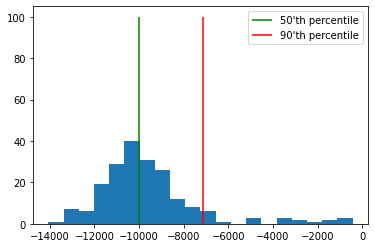

In [17]:
%%time
# let's see the initial reward distribution
import matplotlib.pyplot as plt
%matplotlib inline

sample_rewards = [generate_session(env, policy, t_max=1000)[-1] for _ in range(200)]

plt.hist(sample_rewards, bins=20)
plt.vlines([np.percentile(sample_rewards, 50)], [0], [100], label="50'th percentile", color='green')
plt.vlines([np.percentile(sample_rewards, 90)], [0], [100], label="90'th percentile", color='red')
plt.legend()

**Cross-entropy method steps**

In [18]:
def select_elites(states_batch, actions_batch, rewards_batch, percentile):
    """
    Select states and actions from games that have rewards >= percentile
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of rewards, rewards_batch[session_i]

    :returns: elite_states,elite_actions, both 1D lists of states and respective actions from elite sessions

    Please return elite states and actions in their original order 
    [i.e. sorted by session number and timestep within session]
    """

    reward_threshold = np.percentile(rewards_batch, percentile)

    idx = np.where(rewards_batch >= reward_threshold)[0]

    elite_states = []
    elite_actions = []
    for i in idx:
      elite_states.extend(states_batch[i])
      elite_actions.extend(actions_batch[i])

    return elite_states, elite_actions

In [19]:
def update_policy(elite_states, elite_actions):
    """
    Given old policy and a list of elite states/actions from select_elites,
    return new updated policy where each action probability is proportional to

    policy[s_i,a_i] ~ #[occurences of si and ai in elite states/actions]

    Don't forget to normalize policy to get valid probabilities and handle 0/0 case.
    In case you never visited a state, set probabilities for all actions to 1./n_actions

    :param elite_states: 1D list of states from elite sessions
    :param elite_actions: 1D list of actions from elite sessions

    """

    new_policy = np.zeros([n_states, n_actions])

    #update probabilities for actions given elite states & actions
    s_unique, s_counts = np.unique(elite_states, return_counts=True)
    a = np.array(elite_actions)
    s = np.array(elite_states)
    for i, s_i in enumerate(s_unique): 
      actions = a[s == s_i] 
      a_unique, a_counts = np.unique(actions, return_counts=True) 
      new_policy[s_i, a_unique] = a_counts/s_counts[i]  

    # set 1/n_actions for all actions in unvisited states.  
    for i in range(new_policy.shape[0]):
      if i not in s_unique: 
        new_policy[i].fill(1.0/n_actions)

    return new_policy

**Training loop**

Generate sessions, select N best and fit to those.

In [20]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[-990, +10]):
    """
    A convenience function that displays training progress. 
    No cool math here, just charts.
    """

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])
    
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()
    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
    plt.show()

mean reward = -14.192, threshold=-15.000


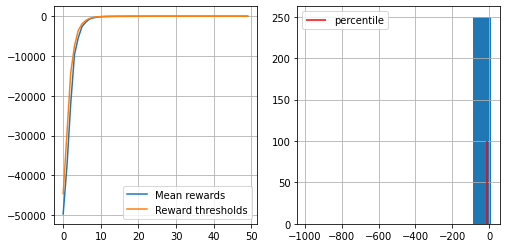

100%|██████████| 50/50 [01:53<00:00,  2.27s/it]

CPU times: user 1min 53s, sys: 284 ms, total: 1min 53s
Wall time: 1min 53s


In [21]:
%%time
from tqdm import tqdm
n_sessions = 250  # sample this many sessions
percentile = 50  # take this percent of session with highest rewards
learning_rate = 0.5  # add this thing to all counts for stability

log = []

for i in tqdm(range(50)):

    %time sessions = [generate_session(env, policy) for i in range(n_sessions)]

    states_batch, actions_batch, rewards_batch = zip(*sessions)

    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)

    new_policy = update_policy(elite_states, elite_actions)

    policy = learning_rate*new_policy + (1-learning_rate)*policy

    # display results on chart
    show_progress(rewards_batch, log, percentile)

As we can see, the reward has been definitely improved, although, the cross-entropy method is not an optimal for this environment.

### Bellman equations

Bellman equations are the main toolkit for finding optimal policy. Let's define the main terms.

**Cumulative discounted return**

$$G_t = \sum\limits_{k=0}^{\infty}\gamma^k R_{t+k}$$

where $\gamma$ is the *discount factor* and $R_t$ is an *immediate reward* at step $t$.

**State-value function $v(s)$**

is a return conditional on state $s$:

$$v_{\pi}(s) = \mathbb{E}_{\pi}[G_t|S_t=s]$$

**Action-value function $q(a, s)$**

is a return conditional on state $s$ and action $a$:

$$q_{\pi}(a, s) = \mathbb{E}_{\pi}[G_t|S_t=s, A_t=a]$$

**Bellman expectation equations**

We can formulate Bellman Expectation Equations for a given MDP to find it’s State-Value Function and State-Action Value Function. These equations allow for assessment of the policy performance.

$$v_{\pi}(s) = \sum\limits_a\pi(a|s)\sum\limits_{r,s^{\prime}}p(r, s^{\prime}| s, a)[r+\gamma v_{\pi}(s^{\prime})] = \mathbb{E}_{\pi}[R_t + \gamma v_{\pi}(S_{t+1})|S_t=s]$$

$$q_{\pi}(s, a) = \sum\limits_{r,s^{\prime}}p(r, s^{\prime}| s, a)[r+\gamma v_{\pi}(s^{\prime})] = \sum\limits_{r,s^{\prime}}p(r, s^{\prime}| s, a)\left[r+\gamma\sum\limits_{a^{\prime}}\pi(a^{\prime}|s^{\prime})q_{\pi}(s^{\prime},a^{\prime})\right]$$

The first equation tells us that the value of a particular state is determined by the immediate reward plus the value of successor states when we are following a certain policy $\pi$.

The second equation, tells us that the state-action value of a state can be decomposed into the immediate reward we get on performing a certain action in state $s$ and moving to another state $s^{\prime}$ plus the discounted value of the state-action value of the state $s^{\prime}$ with respect to the some action $a$ our agent will take from that state.

**Bellman optimality equations**

These equations address the problem of finding of the optimal policy $\pi_*$.

$$v_*(s) = \max\limits_a\sum\limits_{r,s^{\prime}}p(r, s^{\prime}| s, a)[r+\gamma v_*(s^{\prime})] = \max\limits_a\mathbb{E}_{\pi}[R_t + \gamma v_*(S_{t+1})|S_t=s, A_t=a]$$

$$q_*(s) = \sum\limits_{r,s^{\prime}}p(r, s^{\prime}| s, a)[r+\gamma\max\limits_a q_*(s^{\prime}, a^{\prime})] = \mathbb{E}_{\pi}[R_t + \gamma \max\limits_{a^{\prime}}q_*(S_{t+1}, a^{\prime})|S_t=s, A_t=a]$$

where $v_*(s)=\max\limits_{\pi}v_{\pi}(s)$ means use of the optimal policy from state $s$ and $q_*(s, a) = \max\limits_{\pi}q_{\pi}(s, a)$ means use the optimal policy after commiting action $a$.

### Q-learning

1. Initialize state-action value $q(s, a)$
2. Repeat:
  - sample $<s, a, r, s^{\prime}>$ from the environment
  - compute $\hat{q}(s,a)=r(s,a)+\gamma\max\limits_{a_i}q(s^{\prime},a_i)$
  - update $\hat{q}(s,a)\leftarrow \alpha\hat{q}(s,a)+(1-\alpha)q(s,a)$ (e.g. with the moving average)

### Exploration vs. exploitation

![exploration](exploration.png)

Image from http://ai.berkeley.edu/lecture_slides.html

Taking always the optimal policy not always works. This is solved by taking a random action with a probability $\epsilon$.

### State–action–reward–state–action (SARSA) 

SARSA gets optimal rewards under current exploration strategy.

1. Initialize state-action value $q(s, a)$
2. Repeat:
  - sample $<s, a, r, s^{\prime}, a^{\prime}>$ from the environment
  - compute $\hat{q}(s,a)=r(s,a)+\gamma q(s^{\prime},a^{\prime})$
  - update $\hat{q}(s,a)\leftarrow \alpha\hat{q}(s,a)+(1-\alpha)q(s,a)$ 


### Expected value SARSA 

1. Initialize state-action value $q(s, a)$
2. Repeat:
  - sample $<s, a, r, s^{\prime}, a^{\prime}>$ from the environment
  - compute $\hat{q}(s,a)=r(s,a)+\gamma \mathbb{E}_{a_i\sim\pi(a|s^{\prime})} q(s^{\prime},a^{\prime})$
  - update $\hat{q}(s,a)\leftarrow \alpha\hat{q}(s,a)+(1-\alpha)q(s,a)$ 


### Experience replay

Store several past iterations $<s, a, r, s^{\prime}>$ and train on random subsamples.


## Approximate solution methods

![minecraft](minecraft.png)

What if the state space is arbitrary large? Tabular methods are not applicable: we cannot expect to find an optimal policy or value function even having an infinite time and data. 

Our goal in this case is to find a good approximate solution.

Policy $\pi_W(a|s)$ is approximated, for example, by neural network. Let's see how this will change the tabular methods.

### Approximate cross-entropy method

1. Initialize weights $W_0$ of the neural network with some random values.
2. Repeat:
    * Sample $N$ sessions
    * Pick $M$ best sessions, called *elite sessions*. Elite$ = [(s_0, a_0), \dots(s_M, a_M)]$ and concatenate: $$W_{i+1} = W_i + \alpha\nabla\left[\sum\limits_{s_i,a_i\in\text{Elite}}\log\pi_{W_i}(a_i|s_i)\right]$$
    * Maximize likelyhood (`model.fit(elite_states, elite_actions)`) [5].

Let's try to use it.

#### Exercise 2: 

Use an approximate cross-entropy method to bring the car to the top of the mountain. This exercise is based on https://github.com/yandexdataschool/Practical_RL/blob/coursera/week1_intro/deep_crossentropy_method.ipynb

In [22]:
%%time
from sklearn.neural_network import MLPClassifier

env = gym.make('MountainCar-v0').env

env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape[0]
print("n_actions = ", n_actions)

agent = MLPClassifier(
    hidden_layer_sizes=(30, 30),
    activation='tanh',
)

# initialize agent to the dimension of state space and number of actions
agent.partial_fit([env.step(env.action_space.sample())[0] for _ in range(n_actions)], range(n_actions), range(n_actions))

n_actions =  3
CPU times: user 128 ms, sys: 3.95 ms, total: 132 ms
Wall time: 132 ms


MLPClassifier(activation='tanh', hidden_layer_sizes=(30, 30))

In [23]:
def generate_session_mountain_car(env, agent, t_max=10000):
    """
    Play a single game using agent neural network.
    Terminate when game finishes or after :t_max: steps
    """
    states, actions = [], []
    total_reward = 0

    s = env.reset()

    for t in range(t_max):
        
        # use agent to predict a vector of action probabilities for state :s:
        probs = agent.predict_proba(s.reshape(1, -1)).reshape(n_actions)

        assert probs.shape == (n_actions,), "make sure probabilities are a vector (hint: np.reshape)"
        
        # use the probabilities you predicted to pick an action
        # sample proportionally to the probabilities, don't just take the most likely action
        a = np.random.choice(np.arange(n_actions), p=probs)
        # ^-- hint: try np.random.choice

        new_s, r, done, info = env.step(a)

        # record sessions
        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if done:
            break
    
    return states, actions, total_reward

In [24]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[-990, +10]):
    """
    A convenience function that displays training progress. 
    No cool math here, just charts.
    """

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])

    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()

    plt.show()

In [25]:
def select_elites(states_batch, actions_batch, rewards_batch, percentile=50):
    """
    Select states and actions from games that have rewards >= percentile
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of rewards, rewards_batch[session_i]

    :returns: elite_states,elite_actions, both 1D lists of states and respective actions from elite sessions

    Please return elite states and actions in their original order 
    [i.e. sorted by session number and timestep within session]

    Please don't assume that states are integers.
    """
    
    reward_threshold = np.percentile(rewards_batch, percentile)

    idx = np.where(rewards_batch >= reward_threshold)[0]
        
    elite_states = []
    elite_actions = []
    for i in idx:
      elite_states.extend(states_batch[i])
      elite_actions.extend(actions_batch[i])
    
    return elite_states, elite_actions

mean reward = -182.380, threshold=-158.700


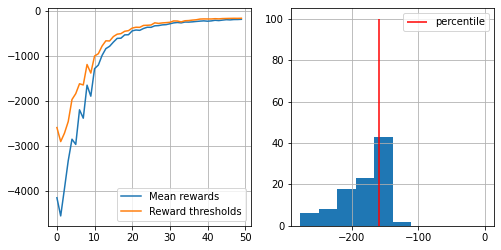

100%|██████████| 50/50 [10:46<00:00, 12.93s/it]

CPU times: user 10min 45s, sys: 1.58 s, total: 10min 47s
Wall time: 10min 46s


In [26]:
%%time
from tqdm import tqdm
n_sessions = 100
percentile = 70
log = []


for i in tqdm(range(50)):
    # generate new sessions
    sessions = [generate_session_mountain_car(env, agent) for i in range(n_sessions)]

    states_batch, actions_batch, rewards_batch = map(np.array, zip(*sessions))

    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)

    #<YOUR CODE: partial_fit agent to predict elite_actions(y) from elite_states(X)>
    agent.partial_fit(np.array(elite_states).reshape(-1, 2), elite_actions)

    show_progress(rewards_batch, log, percentile, reward_range=[np.min(rewards_batch), 0])

    if np.mean(rewards_batch) > -150:
        print("You Win! You may stop training now via KeyboardInterrupt.")

In [27]:
# Record sessions
import gym.wrappers

with gym.wrappers.Monitor(gym.make('MountainCar-v0').env, directory="video_mcar", force=True) as env_monitor:
    sessions = [generate_session_mountain_car(env_monitor, agent) for _ in range(100)]

In [28]:
# Show video. This may not work in some setups. 

from pathlib import Path
from IPython.display import HTML

video_names = sorted([s for s in Path('video_mcar').iterdir() if s.suffix == '.mp4'])


HTML("""
<video width="320" height="240" controls>
  <source src="{}" type="video/mp4">
</video>
""".format(video_names[-1]))  # You can also try other indices

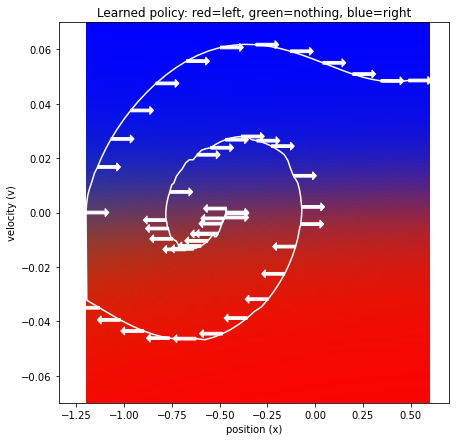

In [29]:
# this code snipped is taken from 
# https://github.com/yandexdataschool/Practical_RL/blob/coursera/week1_intro/deep_crossentropy_method.ipynb

def visualize_mountain_car(env, agent):
    # Compute policy for all possible x and v (with discretization)
    xs = np.linspace(env.min_position, env.max_position, 100)
    vs = np.linspace(-env.max_speed, env.max_speed, 100)
    
    grid = np.dstack(np.meshgrid(xs, vs[::-1])).transpose(1, 0, 2)
    grid_flat = grid.reshape(len(xs) * len(vs), 2)
    probs = agent.predict_proba(grid_flat).reshape(len(xs), len(vs), 3).transpose(1, 0, 2)

    # # The above code is equivalent to the following:
    # probs = np.empty((len(vs), len(xs), 3))
    # for i, v in enumerate(vs[::-1]):
    #     for j, x in enumerate(xs):
    #         probs[i, j, :] = agent.predict_proba([[x, v]])[0]

    # Draw policy
    f, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(probs, extent=(env.min_position, env.max_position, -env.max_speed, env.max_speed), aspect='auto')
    ax.set_title('Learned policy: red=left, green=nothing, blue=right')
    ax.set_xlabel('position (x)')
    ax.set_ylabel('velocity (v)')
    
    # Sample a trajectory and draw it
    states, actions, _ = generate_session_mountain_car(env, agent)
    states = np.array(states)
    ax.plot(states[:, 0], states[:, 1], color='white')
    
    # Draw every 3rd action from the trajectory
    for (x, v), a in zip(states[::3], actions[::3]):
        if a == 0:
            plt.arrow(x, v, -0.1, 0, color='white', head_length=0.02)
        elif a == 2:
            plt.arrow(x, v, 0.1, 0, color='white', head_length=0.02)

with gym.make('MountainCar-v0').env as env:
    visualize_mountain_car(env, agent)

If the video is not recorded correctly, there is a bug in your version of `gym`. It is easy to fix that. You need to open a file `/path/to/gym/wrappers/monitoring/video_recorder.py` and edit this piece of code:

```python
def capture_frame(self, frame):
    if not isinstance(frame, (np.ndarray, np.generic)):
        raise error.InvalidFrame('Wrong type {} for {} (must be np.ndarray or np.generic)'.format(type(frame), frame))
    if frame.shape != self.frame_shape:
        raise error.InvalidFrame("Your frame has shape {}, but the VideoRecorder is configured for shape {}.".format(frame.shape, self.frame_shape))
    if frame.dtype != np.uint8:
        raise error.InvalidFrame("Your frame has data type {}, but we require uint8 (i.e. RGB values from 0-255).".format(frame.dtype))

        self.proc.stdin.write(frame.tobytes())
```

As you can see, the line `self.proc.stdin.write(frame.tobytes())` is never executed, there is an indentation error which needs to be corrected. After correction the code should look like this:

```python
def capture_frame(self, frame):
    if not isinstance(frame, (np.ndarray, np.generic)):
        raise error.InvalidFrame('Wrong type {} for {} (must be np.ndarray or np.generic)'.format(type(frame), frame))
    if frame.shape != self.frame_shape:
        raise error.InvalidFrame("Your frame has shape {}, but the VideoRecorder is configured for shape {}.".format(frame.shape, self.frame_shape))
    if frame.dtype != np.uint8:
        raise error.InvalidFrame("Your frame has data type {}, but we require uint8 (i.e. RGB values from 0-255).".format(frame.dtype))

    self.proc.stdin.write(frame.tobytes())
```

### Deep Q-learning with experience replay and target networks

Q-network is a neural network that acts as a function approximator for an action-value function $q(s, a; w)\approx q^*(s,a)$. Q-network can be trained by minimising a sequence of loss functions $L_i(w_i)$, that changes at each iteration. For further details, please refer to [8]. 

**And now let's try it in praxis!**

## References

[[1]](http://incompleteideas.net/book/the-book.html) Richard S. Sutton and Andrew G. Barto, *Reinforcement Learning: An Introduction*,  MIT Press, Cambridge, MA, 2018

[[2]](https://www.guru99.com/reinforcement-learning-tutorial.html) Reinforcement Learning: What is, Algorithms, Applications, Example 

[[3]](https://gym.openai.com/docs/) Openai gym documentation

[[4]](https://github.com/yandexdataschool/Practical_RL) An open course on reinforcement learning. Taught by HSE University and Yandex School of Data Analysis (YSDA).

[[5]](https://www.coursera.org/learn/practical-rl) Coursera course on Practical RL

[[6]](https://arxiv.org/abs/1312.5602) Volodymyr Mnih, Koray Kavukcuoglu, David Silver, Alex Graves, Ioannis Antonoglou, Daan Wierstra, Martin Riedmiller, *Playing Atari with Deep Reinforcement Learning*,  arXiv:1312.5602v1

[[7]](https://www.davidsilver.uk/teaching/) David Silver, *Lectures on Reinforcement Learning*, 2015

[[8]](https://arxiv.org/pdf/1312.5602.pdf) V. Mnih et. al. *Playing Atari with Deep Reinforcement Learning*, arXiv:1312.5602v1, 2013